# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Data Import
df = pd.read_csv("Wholesale_Data.csv")

# Display first few rows
print("Dataset Head:")
print(df.head())

Dataset Head:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [3]:
# 2. Data Cleaning

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Remove any negative values if present
df = df[(df >= 0).all(axis=1)]


Missing Values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [4]:
# 3. Data Description

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000     

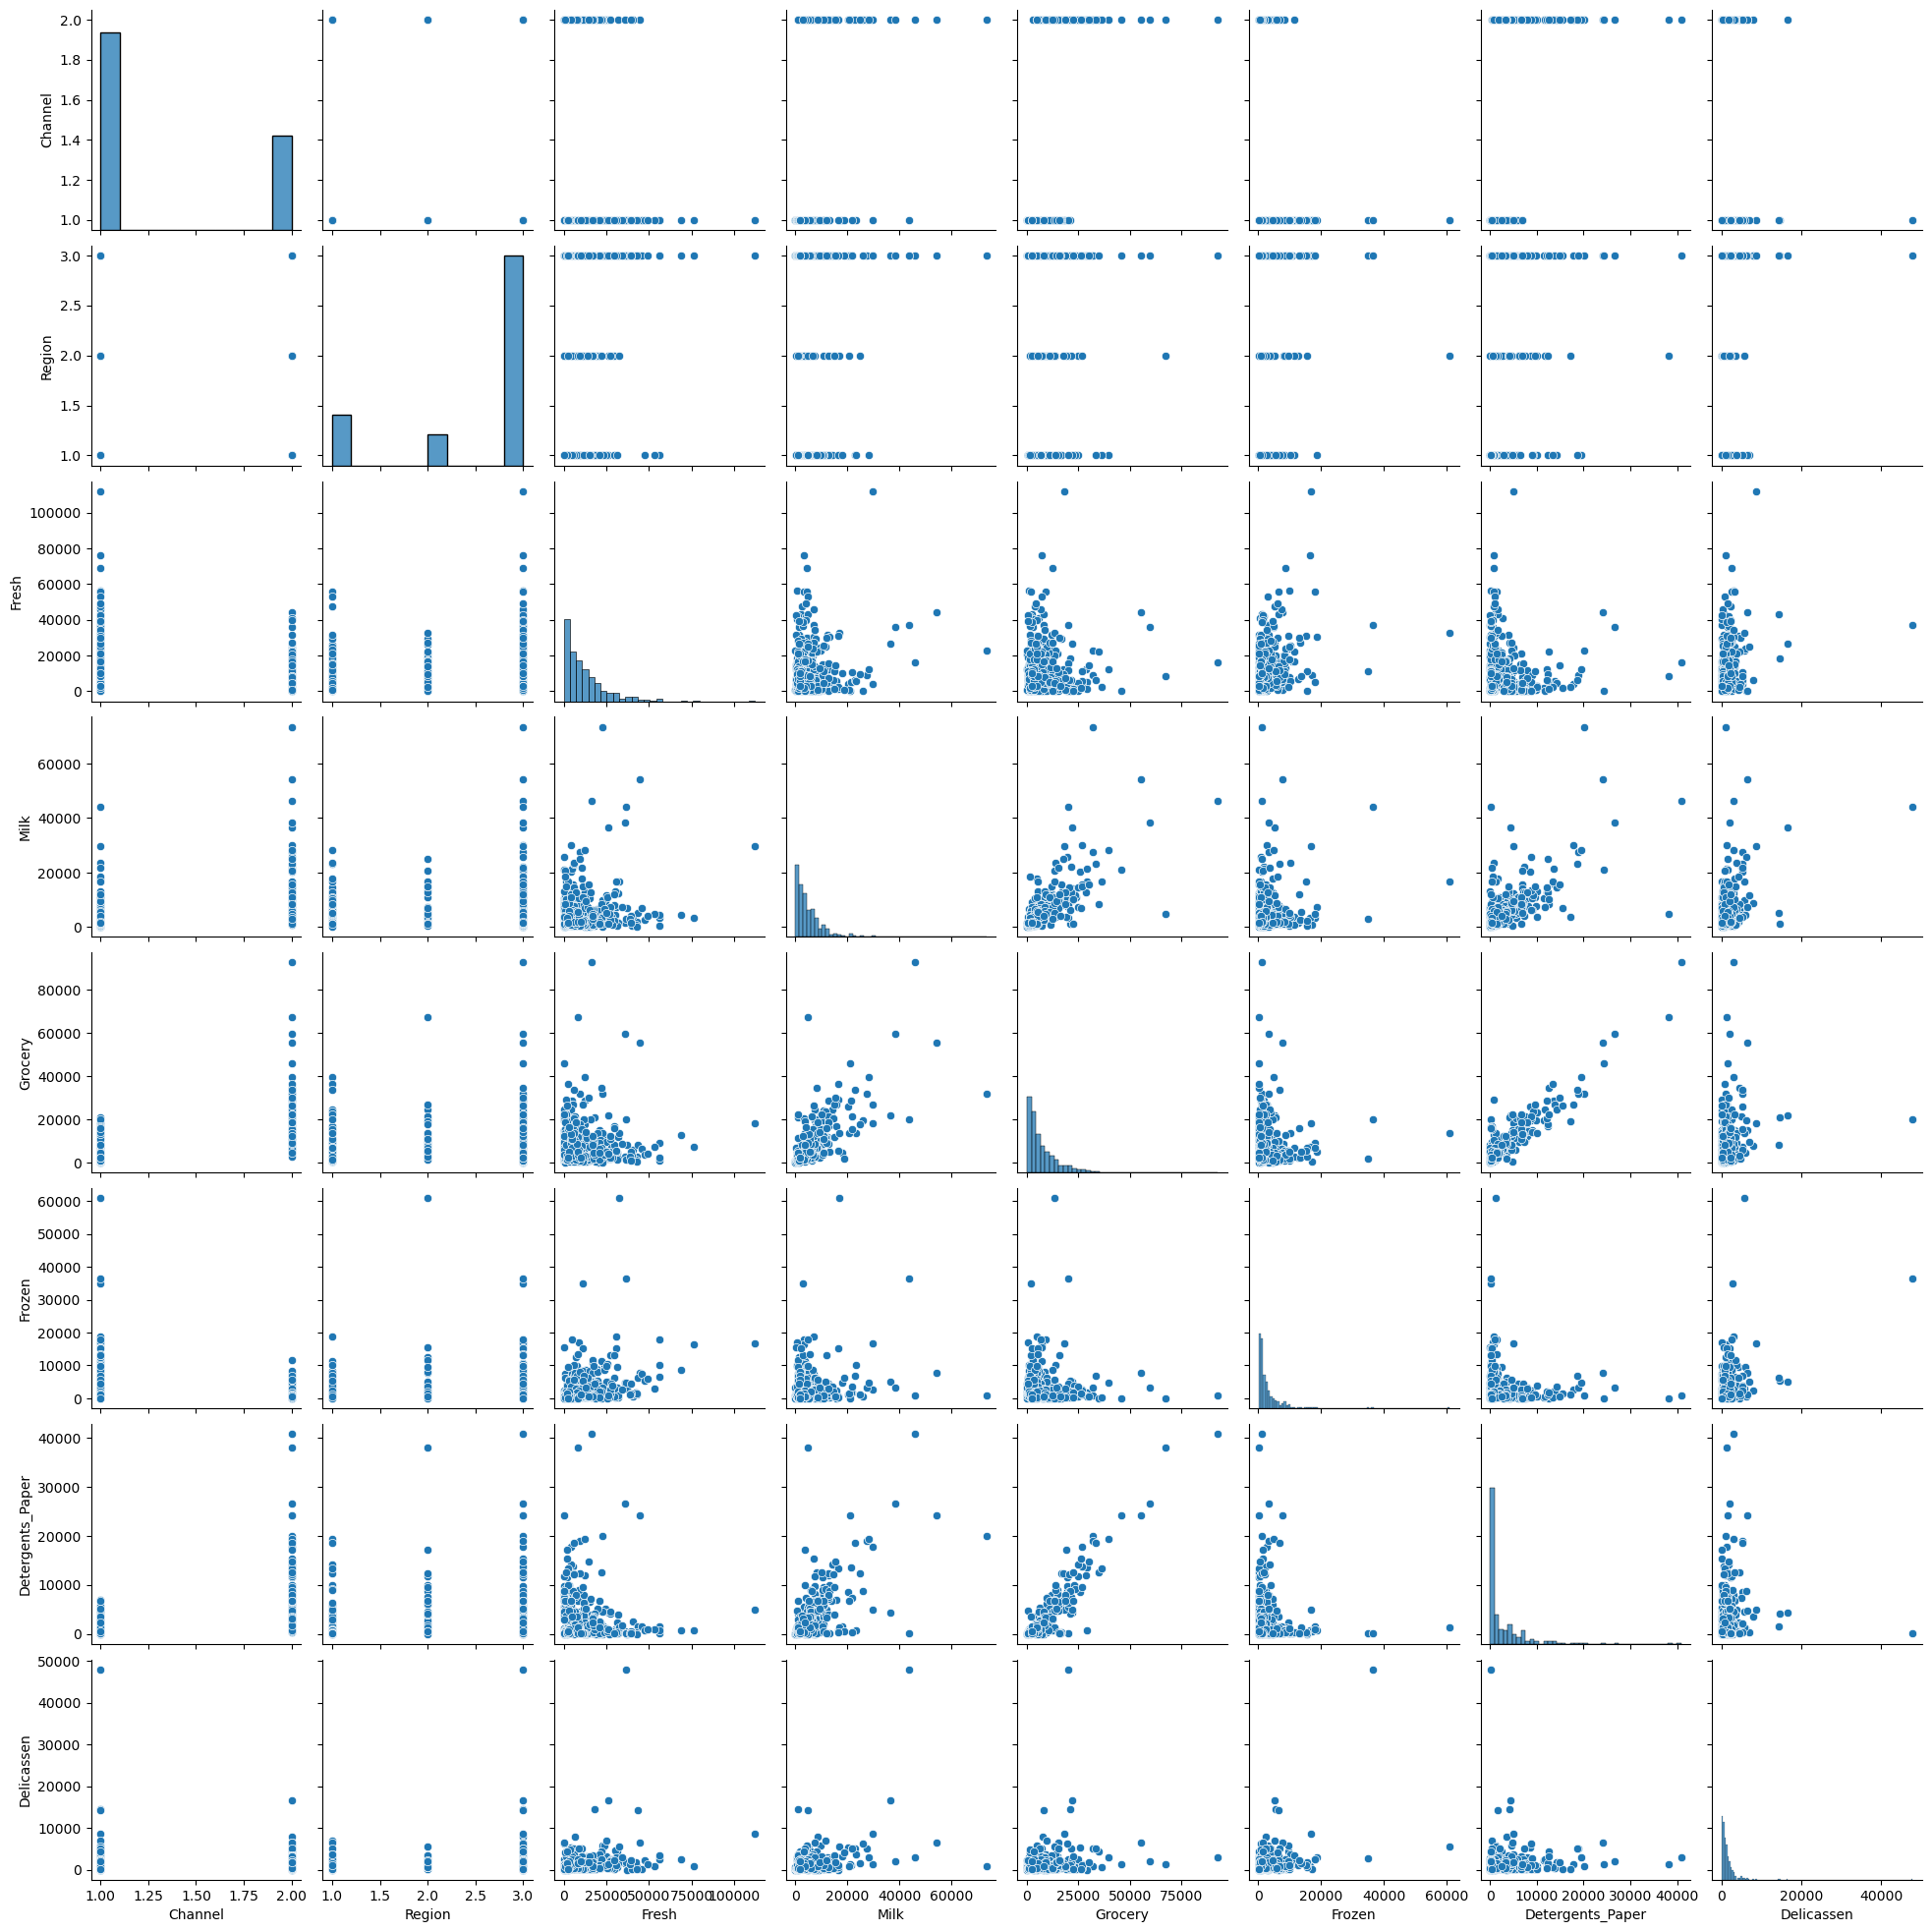

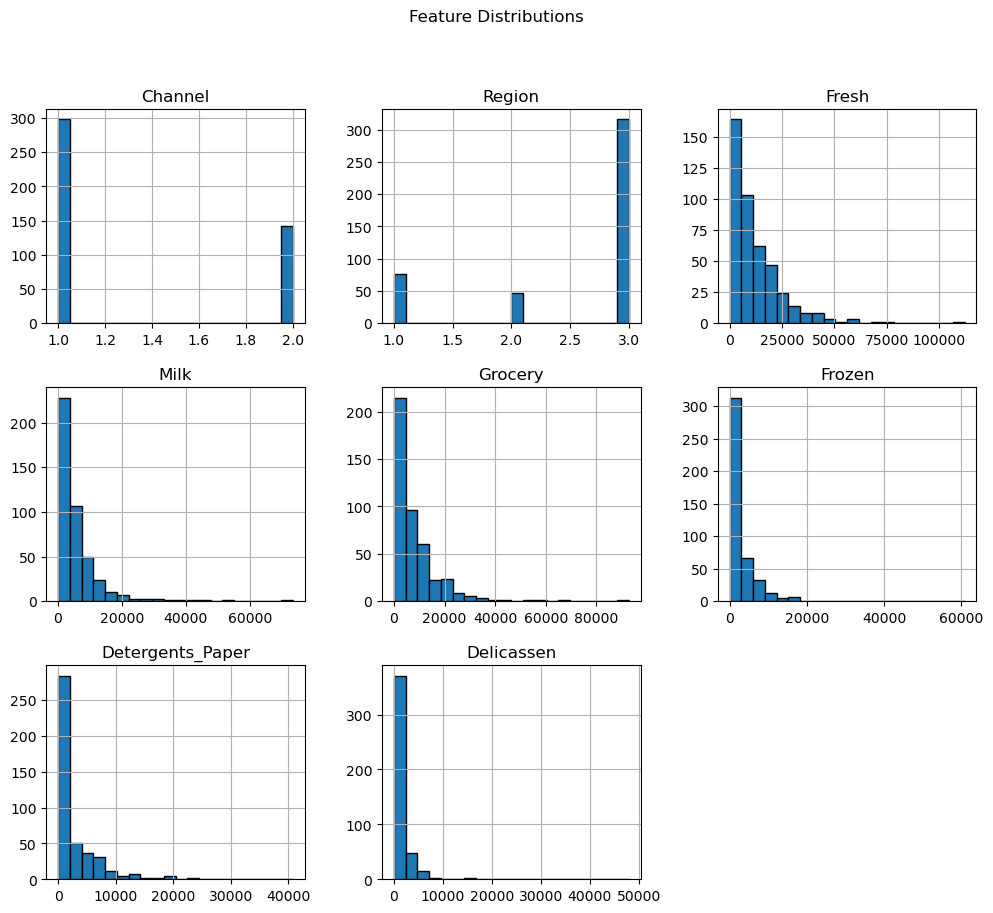

In [5]:
# 4. Data Visualization

sns.pairplot(df)
plt.show()

df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

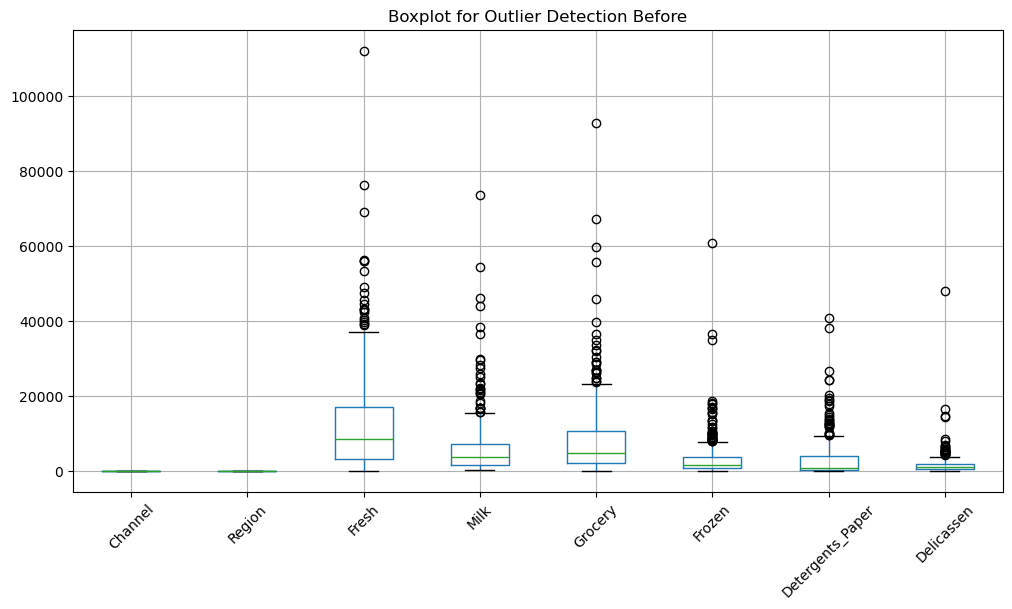

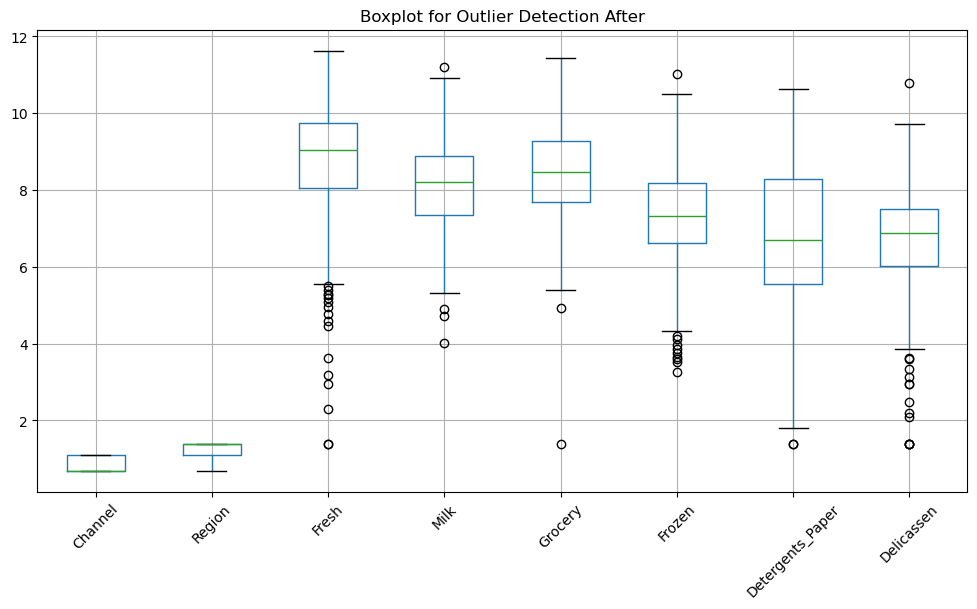

In [6]:
# 5. Outlier Detection

# Boxplot for outlier detection
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Boxplot for Outlier Detection Before")
plt.show()

# Log Transformation to reduce the impact of outliers
df_transformed = np.log1p(df)  # log1p ensures log(0) is handled safely
df = pd.DataFrame(df_transformed, columns=df.columns)

# Boxplot for outlier detection after we log transform
plt.figure(figsize=(12, 6))
df.boxplot(rot=45)
plt.title("Boxplot for Outlier Detection After")
plt.show()

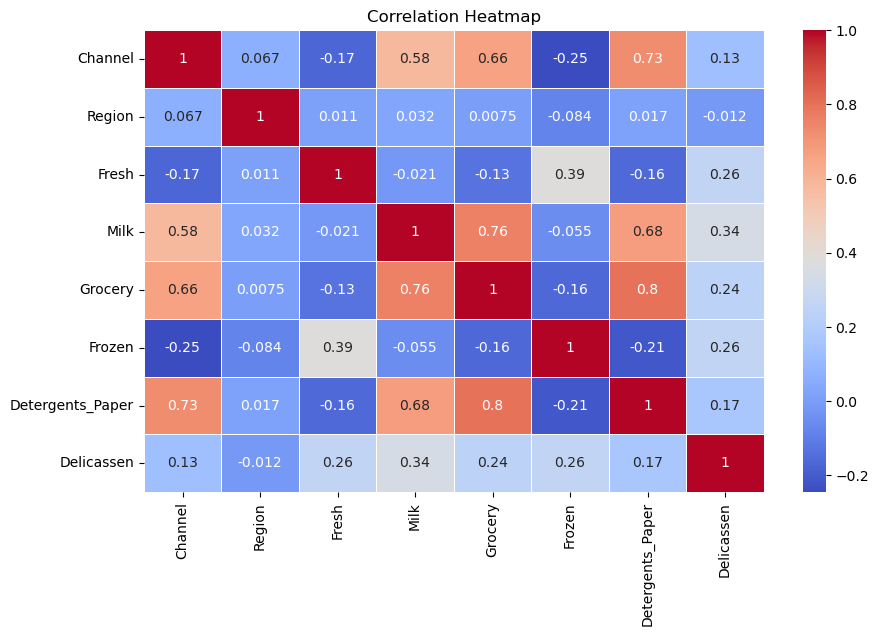


Correlation Coefficients between all variables:
                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.067078 -0.169481  0.577282  0.662808 -0.245034   
Region            0.067078  1.000000  0.010704  0.032044  0.007458 -0.084088   
Fresh            -0.169481  0.010704  1.000000 -0.021096 -0.132989  0.386258   
Milk              0.577282  0.032044 -0.021096  1.000000  0.761128 -0.055229   
Grocery           0.662808  0.007458 -0.132989  0.761128  1.000000 -0.164525   
Frozen           -0.245034 -0.084088  0.386258 -0.055229 -0.164525  1.000000   
Detergents_Paper  0.727093  0.017111 -0.158706  0.678725  0.797141 -0.212771   
Delicassen        0.131209 -0.011759  0.256442  0.342310  0.239998  0.256318   

                  Detergents_Paper  Delicassen  
Channel                   0.727093    0.131209  
Region                    0.017111   -0.011759  
Fresh                    -0.158706    0.256442  
Milk                      0.678725

In [7]:
# 6. Correlation Analysis

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Calculate the correlation coefficients between all pairs of variables
correlation_matrix = df.corr()

# Display the correlation matrix
print("\nCorrelation Coefficients between all variables:")
print(correlation_matrix)

In [8]:
# 7. Data Transformation
# Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


Explained Variance Ratio:
[0.4074929  0.20587587]


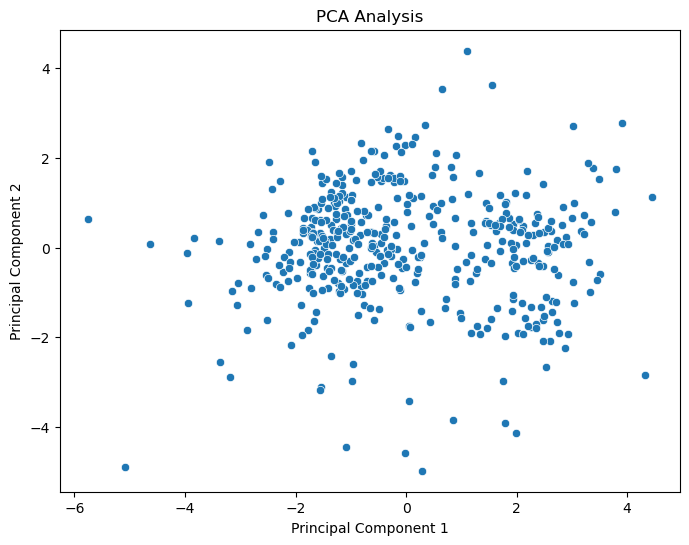

In [10]:
# 8. Feature Selection

# PCA for Feature Selection
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Scatter plot of first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Analysis")
plt.show()

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [11]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant columns for clustering
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_clustering = df[features]

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

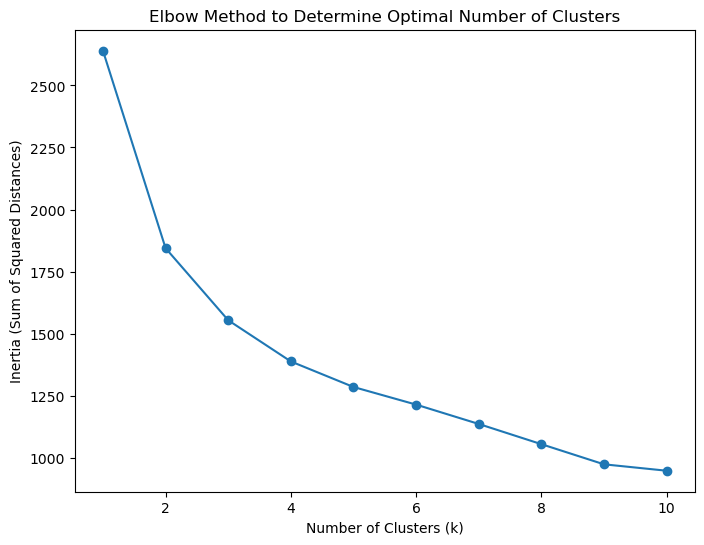

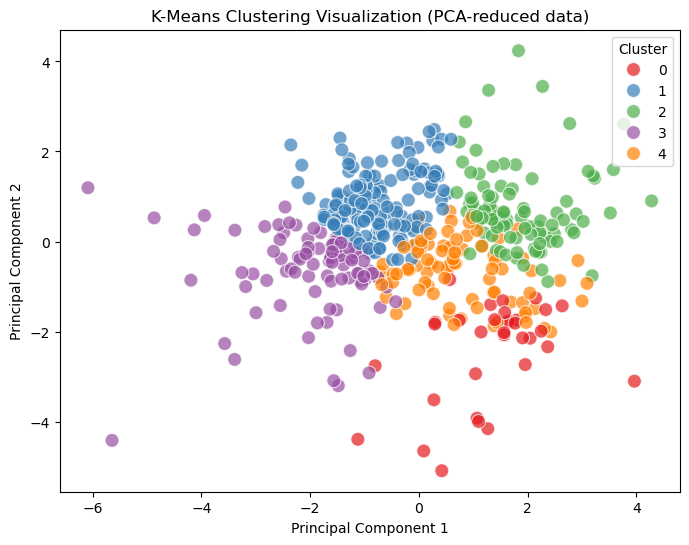

In [12]:
# Elbow Method to find optimal number of clusters
inertia = []
k_range = range(1, 11)  # Trying k from 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.show()

# Apply KMeans clustering with optimal k
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df['Cluster'] = labels

# PCA to reduce the data to 2D for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette="Set1", s=100, alpha=0.7)
plt.title("K-Means Clustering Visualization (PCA-reduced data)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster', loc='upper right')
plt.show()



# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

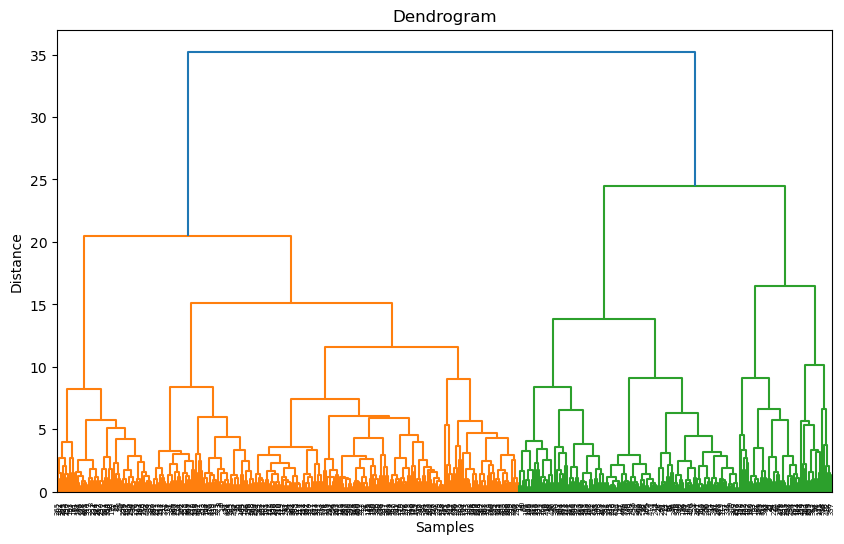

In [13]:
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

# Select relevant columns for clustering
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_clustering = df[features]

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Compute the distance matrix (using Euclidean distance by default)
distance_matrix = sch.distance.pdist(df_scaled, metric='euclidean')

plt.figure(figsize=(10, 6))
sch.dendrogram(sch.linkage(df_scaled, method='ward'))  # 'ward' minimizes variance within clusters
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show() 


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Explained Variance Ratio for Each Principal Component:
[0.44077752 0.27194917 0.10698428 0.10103287 0.04876269 0.03049347]


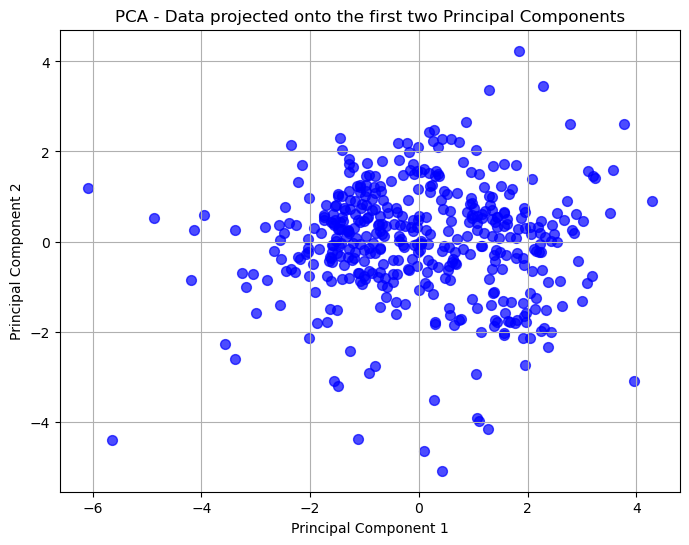

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select the relevant columns for PCA (assuming these are the features to analyze)
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_clustering = df[features]

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for Each Principal Component:")
print(explained_variance_ratio)

# Transform the data to the first two principal components
df_pca = pca.transform(df_scaled)

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.7, c='b', s=50)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Data projected onto the first two Principal Components")
plt.grid(True)
plt.show()


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Principal Component Analysis (PCA) Reveals Key Variances: The first two principal components explain over 68% of the variance in the dataset, with the first component accounting for 42% and the second for 25.9%. This suggests that these two components capture most of the information in the data, allowing for dimensionality reduction.

- Strong Correlations Among Certain Features: The variables "Milk" and "Grocery" have a high positive correlation (0.7), indicating that customers who purchase more milk also tend to purchase more grocery items. Similarly, "Milk" and "Detergents_Paper" are also strongly correlated (0.65), highlighting a potential relationship in purchasing patterns.

- Weaker Correlation Between "Region" and Other Variables: "Region" shows very weak correlations with other features, with all correlation values close to zero. This suggests that the region may not significantly impact customer purchasing patterns in terms of the other product categories analyzed.

- Outlier Impact on Analysis: During the data preprocessing phase, outliers were identified and removed, and log transformations were applied to reduce the influence of extreme values. The final dataset shows a more consistent distribution of features, helping in both clustering and PCA analysis. These findings help in understanding customer behavior and the relationships between different product categories, which can be used for more targeted marketing or product offerings.
